# NI-DAQmx counter ex

___
___

072022 $\rightarrow$ 072222

## imports

___


In [1]:
import nidaqmx
import numpy as np

from nidaqmx.constants import(
    Edge,
    CountDirection,
    AcquisitionType,
    FrequencyUnits
)

# import from specific nidaqmx package
from nidaqmx.stream_readers import CounterReader

## def variables

___


In [2]:
integration_time = 0.25
sample_rate = 1000
timeout = 5*2*1.0/sample_rate
max_samples = 12
print(sample_rate, timeout)

1000 0.01


## main program

__


In [11]:
#
with nidaqmx.Task() as task1, nidaqmx.Task() as counter_output_task:

    #
    counter_output_task.co_channels.add_co_pulse_chan_freq(
        counter = "cDAQ1Mod1/ctr1",
        name_to_assign_to_channel = "",
        units = FrequencyUnits.HZ,
        idle_state = nidaqmx.constants.Level.LOW,
        initial_delay = 0.0,
        freq = sample_rate,
        duty_cycle = 0.5
        )

    #
    counter_output_task.timing.cfg_implicit_timing(
        sample_mode = AcquisitionType.CONTINUOUS,
        samps_per_chan = 1,
        )

    #
    task1.ci_channels.add_ci_count_edges_chan(
        counter="cDAQ1Mod1/ctr0",
        name_to_assign_to_channel="",
        edge=Edge.RISING,
        initial_count = 0,
        count_direction = CountDirection.COUNT_UP
        )

    #
    task1.timing.cfg_samp_clk_timing(
        rate = sample_rate,
        source = "/cDAQ1/Ctr1InternalOutput",
        active_edge = Edge.RISING,
        sample_mode = AcquisitionType.CONTINUOUS,
        samps_per_chan = 1 #samples to acquire per channel
        )

    #
    counter_output_task.start()
    task1.start()
    
    data = task1.read(1000)
    print(data)

    # #
    # while True:
    #     data = task1.read(1, timeout=timeout)
    #     print(data, end = " ")

    #
    counter_output_task.stop()
    task1.stop()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

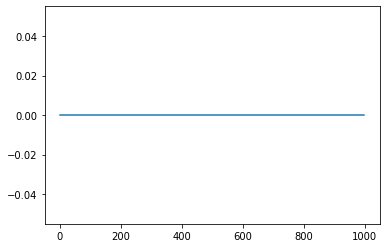

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data)